In [23]:
!pip install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/2d/d2/6473460b1aad0944e8f0d7d618723f4b9d60485554eb1d42c5b193e716ec/pandas-1.2.2-cp37-cp37m-macosx_10_9_x86_64.whl
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


In [40]:
import sklearn
import numpy as np
import pandas as pd
import mlrose
import mlrose_hiive
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import f1_score
from functools import partial
from IPython.display import display
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split, cross_val_predict, StratifiedKFold, cross_validate, GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, average_precision_score, roc_curve, accuracy_score, make_scorer, classification_report
from sklearn import preprocessing
pd.options.display.max_columns = None
matplotlib.rc('figure', figsize=[10,5])

In [25]:
df_churn = pd.read_csv('data/Telecom_customer_churn.csv', index_col = False)
print(df_churn.dtypes)
print(f'unique Value of our Target_class:  {df_churn.Churn.unique()}')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
unique Value of our Target_class:  ['No' 'Yes']


# Creating categorical values nto one hot encoding and dropping null values 

In [26]:
#Removing missing values 
df_churn.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df_churn.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
# normalize features for better performance 
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

SeniorCitizen  tenure  MonthlyCharges  Churn  gender_Female  gender_Male  \
0              0       1           29.85      0              1            0   
1              0      34           56.95      0              0            1   
2              0       2           53.85      1              0            1   
3              0      45           42.30      0              0            1   
4              0       2           70.70      1              1            0   

   Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0           0            1              1               0                1   
1           1            0              1               0                0   
2           1            0              1               0                0   
3           1            0              1               0                1   
4           1            0              1               0                0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0                 0                 0                               1   
1                 1                 1                               0   
2                 1                 1                               0   
3                 0                 0                               1   
4                 1                 1                               0   

   MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                  0                    1                            0   
1                  0                    1                            0   
2                  0                    1                            0   
3                  0                    1                            0   
4                  0                    0                            1   

   InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  \
0                   0                  1                                   0   
1                   0                  0                                   0   
2                   0                  0                                   0   
3                   0                  0                                   0   
4                   0                  1                                   0   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                   0                0                                 0   
1                   1                1                                 0   
2                   1                0                                 0   
3                   1                1                                 0   
4                   0                1                                 0   

   OnlineBackup_Yes  DeviceProtection_No  \
0                 1                    1   
1                 0                    0   
2                 1                    1   
3                 0                    0   
4                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  Strea

In [27]:
predictors_list = ['tenure','InternetService_Fiber optic', 'InternetService_No', 'PaymentMethod_Electronic check',
       'OnlineSecurity_No', 'OnlineBackup_No', 'OnlineBackup_No internet service',  'StreamingTV_No internet service',
       'OnlineSecurity_No internet service','DeviceProtection_No','StreamingMovies_No internet service',
       'DeviceProtection_No internet service','TechSupport_No', 'TechSupport_No internet service','Contract_Two year','Contract_Month-to-month']


In [28]:
# min_max_scaler 

target = df_dummies['Churn']
X = df_dummies[predictors_list] # convert to numpy array
print(X.shape)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)

(7043, 16)


In [29]:
print(x_scaled.shape)
df_churn_scaled = pd.DataFrame(x_scaled, columns=predictors_list)
df_churn_scaled['Churn'] = target
df_churn_scaled.head()

(7043, 16)


tenure  InternetService_Fiber optic  InternetService_No  \
0  0.013889                          0.0                 0.0   
1  0.472222                          0.0                 0.0   
2  0.027778                          0.0                 0.0   
3  0.625000                          0.0                 0.0   
4  0.027778                          1.0                 0.0   

   PaymentMethod_Electronic check  OnlineSecurity_No  OnlineBackup_No  \
0                             1.0                1.0              0.0   
1                             0.0                0.0              1.0   
2                             0.0                0.0              0.0   
3                             0.0                0.0              1.0   
4                             1.0                1.0              1.0   

   OnlineBackup_No internet service  StreamingTV_No internet service  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               0.0                              0.0   

   OnlineSecurity_No internet service  DeviceProtection_No  \
0                                 0.0                  1.0   
1                                 0.0                  0.0   
2                                 0.0                  1.0   
3                                 0.0                  0.0   
4                                 0.0                  1.0   

   StreamingMovies_No internet service  DeviceProtection_No internet service  \
0                                  0.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   0.0   
3                                  0.0                                   0.0   
4                                  0.0                                   0.0   

   TechSupport_No  TechSupport_No internet service  Contract_Two year  \
0             1.0                              0.0                0.0   
1             1.0                              0.0                0.0   
2             1.0                              0.0                0.0   
3             0.0                              0.0                0.0   
4             1.0                              0.0                0.0   

   Contract_Month-to-month  Churn  
0                      1.0      0  
1                      0.0      0  
2                      1.0      1  
3                      0.0      0  
4                      1.0      1

# helper functions 

In [45]:
def split_data(df,feature_ls, y_target, training: bool = False) -> None:
        """
        Split the data into train, test for model building
        
        returns the Test and train data
        """
        if training:
            df = df.sample(frac=1)
            X_train, X_test, y_train,y_test = train_test_split(df[feature_ls], df[y_target], test_size=0.2, random_state=123) 
            print(X_train.shape,X_test.shape)
            #changing object datatype to int 
            return X_train, X_test, y_train,y_test
        
def get_and_save_metrics(true_labels, pred_labels, y_scores):
    """
    Using Sklearn Metrics, returns dataframe of all the relevant evaluation metrics
    for binary classification. 
    """
    
    accuracy = accuracy_score(true_labels, pred_labels)
    tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()
    precision_1 = precision_score(true_labels, pred_labels, pos_label=1)
    precision_0 = precision_score(true_labels, pred_labels, pos_label=0)
    recall_1 = recall_score(true_labels, pred_labels, pos_label=1)
    recall_0 = recall_score(true_labels, pred_labels, pos_label=0)
    f1_score_1 = f1_score(true_labels, pred_labels, pos_label=1)

    f1_score_0 = f1_score(true_labels, pred_labels, pos_label=0)
    auc_score = roc_auc_score(true_labels, y_scores)
    metrics = [[accuracy, tn, tp, fn, fp, precision_1, precision_0, recall_1, recall_0, f1_score_1, f1_score_0, auc_score]]
    metrics_df = pd.DataFrame(metrics)
    metrics_df.columns = ['accuracy', 'true_negative', 'true_positive', 'false_negative', 'false_positive',
                          'precision_class_1', 'precision_class_0', 'recall_class_1', 'recall_class_0',
                          'f1_score_class_1', 'f1_score_class_0', 'roc_auc_score']
    return metrics_df


def learning_curve(estimator, X, y, title = "Learning curve"):
    """
    Plotting learning curve by running 3 fold cross validation
    we will be using f-1 score as we have seen there is class imbalance 
    """
    
    f1_train_mean = []
    f1_train_std = []  
    cv_mean = []
    cv_std = []  
    fit_mean = []
    fit_std = []  
    pred_mean = []
    pred_std = []  

    data_size_list = (np.linspace(.05, 1.0, 20) * len(y)).astype('int')

    for len_data in data_size_list:
        index = np.random.randint(X.shape[0], size=len_data)
        sampl_train_data = X.iloc[index, :]
        sampl_train_label = y.iloc[index]
        scores = cross_validate(estimator, sampl_train_data, sampl_train_label, cv=3, scoring='f1', return_train_score=True)

        f1_train_mean.append(np.mean(scores['train_score']))
        f1_train_std.append(np.std(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score']))
        cv_std.append(np.std(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time']))
        fit_std.append(np.std(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time']))
        pred_std.append(np.std(scores['score_time']))

    f1_train_mean = np.array(f1_train_mean);
    f1_train_std = np.array(f1_train_std)
    cv_mean = np.array(cv_mean);
    cv_std = np.array(cv_std)
    fit_mean = np.array(fit_mean);
    fit_std = np.array(fit_std)
    pred_mean = np.array(pred_mean);
    pred_std = np.array(pred_std)
    
    
    # plotting Learning curve 
    plt.figure()
    plt.title("Learning curve : " + title)
    plt.xlabel("Training size")
    plt.ylabel("F1 Score")
    plt.fill_between(data_size_list, f1_train_mean - 2 * f1_train_std, f1_train_mean + 2 * f1_train_std, alpha=0.1)
    plt.fill_between(data_size_list, cv_mean - 2 * cv_std, cv_mean + 2 * cv_std, alpha=0.1)
    plt.plot(data_size_list, f1_train_mean, 'o-', label="Training Score")
    plt.plot(data_size_list, cv_mean, 'o-',label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()
    
    # plotting time 
    plt.figure()
    plt.title("Time taken by classifier: " + title)
    plt.xlabel("Training size")
    plt.ylabel("Time  in (s)")
    plt.fill_between(data_size_list, fit_mean - 2 * fit_std, fit_mean + 2 * fit_std, alpha=0.1)
    plt.fill_between(data_size_list, pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, alpha=0.1)
    plt.plot(data_size_list, fit_mean, 'o-',  label="Training Time  in (s)")
    plt.plot(data_size_list, pred_std, 'o-', label="Prediction Time in (s)")
    plt.legend(loc="best")
    plt.show()


    # plot_times(data_size_list, fit_mean, fit_std, pred_mean, pred_std, title)

    return f1_train_mean, fit_mean, pred_mean

In [31]:
# splitting data 

X_train, X_test, y_train, y_test = split_data(df=df_churn_scaled,feature_ls=predictors_list, y_target='Churn',training= True)

(5634, 16) (1409, 16)


# Running genetic Algorithm 

# model 1 iteration :  population size 250, Lerning rate 0.01, mutation_prob ability = 0.1  

In [36]:
nn_model1_mp_1_lr_01 = mlrose.NeuralNetwork(hidden_nodes = [60,60], activation = 'relu',
                                 algorithm = 'genetic_alg', max_iters = 10000,bias = True, is_classifier = True, 
                                 learning_rate = 0.01,early_stopping = True,
                                 max_attempts = 100,random_state = 123,pop_size=250,
                                 mutation_prob=0.1)
nn_model1_mp_1_lr_01.fit(X_train, y_train)

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: Runtim

NeuralNetwork(early_stopping=True, hidden_nodes=[60, 60], learning_rate=0.01,
              max_iters=10000, pop_size=250)

In [37]:
# classification report 

In [38]:
y_pred = nn_model1_mp_1_lr_01.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1010
           1       0.67      0.45      0.54       399

    accuracy                           0.78      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))


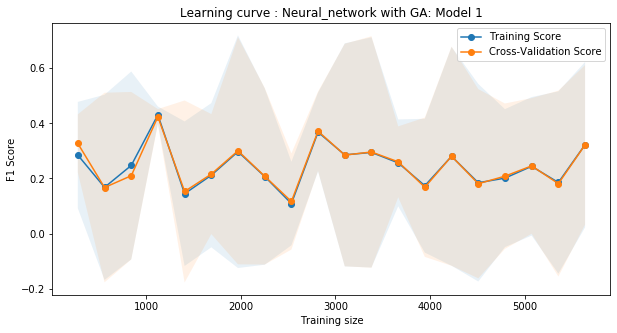

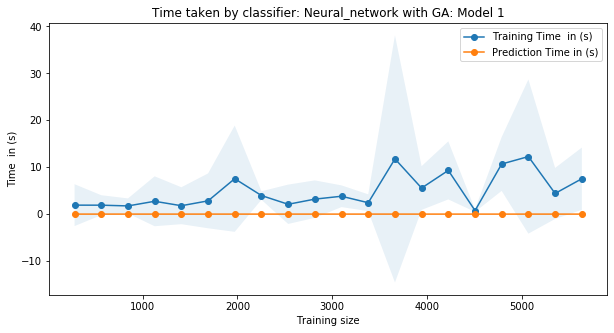

In [46]:
# ploting learning curve and time 
model1_nn_train,model1_nn_fit_time, model1_nn_pred_time = learning_curve(nn_model1_mp_1_lr_01, X_train, y_train, title= "Neural_network with GA: Model 1")

# model 2 iteration :  population size 250, Lerning rate 0.1, mutation_prob ability = 0.1  

In [47]:
nn_model2_mp_1_lr_1  = mlrose.NeuralNetwork(hidden_nodes = [60,60], activation = 'relu',
                                 algorithm = 'genetic_alg', max_iters = 10000,bias = True, is_classifier = True, 
                                 learning_rate = 0.1,early_stopping = True,
                                 max_attempts = 100,random_state = 123,pop_size=250,
                                 mutation_prob=0.1)
nn_model2_mp_1_lr_1.fit(X_train, y_train)

NeuralNetwork(early_stopping=True, hidden_nodes=[60, 60], max_iters=10000,
              pop_size=250)

In [48]:
y_pred = nn_model2_mp_1_lr_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1010
           1       0.67      0.45      0.54       399

    accuracy                           0.78      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



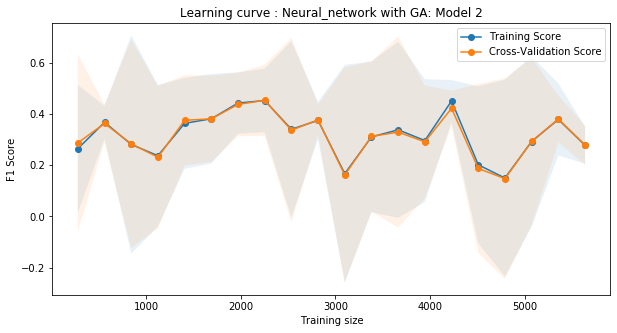

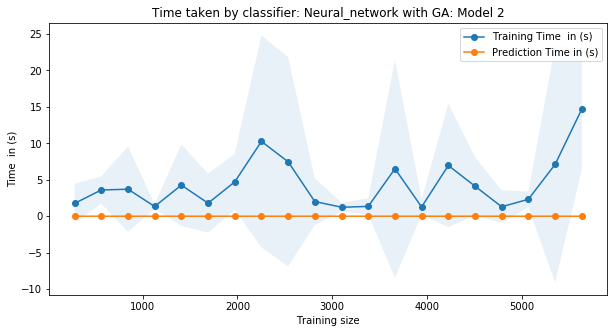

In [49]:
# ploting learning curve and time 
model2_nn_train,model2_nn_fit_time, model2_nn_pred_time = learning_curve(nn_model2_mp_1_lr_1, X_train, y_train, title= "Neural_network with GA: Model 2")

# model 3 iteration :  population size 250, Lerning rate 0.01, mutation_prob ability = 0.25  

In [50]:
nn_model3_mp_25_lr_01 = mlrose.NeuralNetwork(hidden_nodes = [60,60], activation = 'relu',
                                 algorithm = 'genetic_alg', max_iters = 10000,bias = True, is_classifier = True, 
                                 learning_rate = 0.01,early_stopping = True,
                                 max_attempts = 100,random_state = 123,pop_size=250,
                                 mutation_prob=0.25)
nn_model3_mp_25_lr_01.fit(X_train, y_train)

NeuralNetwork(early_stopping=True, hidden_nodes=[60, 60], learning_rate=0.01,
              max_iters=10000, mutation_prob=0.25, pop_size=250)

In [51]:
y_pred = nn_model3_mp_25_lr_01.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1010
           1       0.73      0.35      0.47       399

    accuracy                           0.78      1409
   macro avg       0.76      0.65      0.67      1409
weighted avg       0.77      0.78      0.75      1409



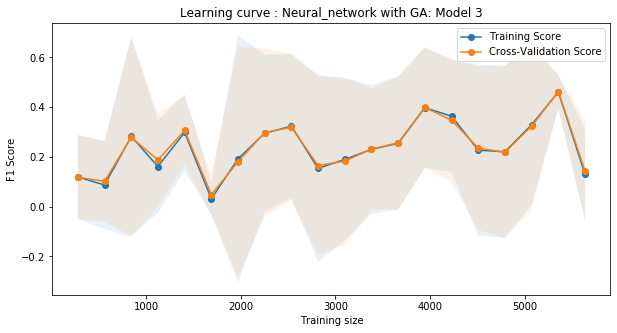

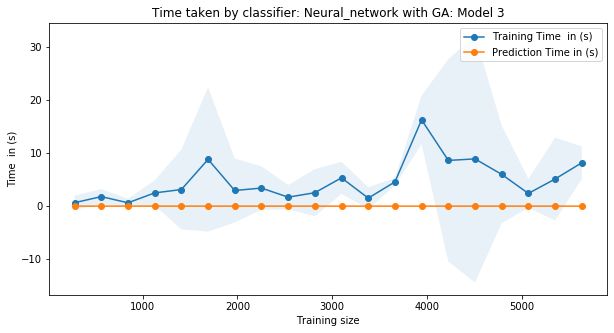

In [52]:
# ploting learning curve and time 
model3_nn_train,model3_nn_fit_time, model3_nn_pred_time = learning_curve(nn_model3_mp_25_lr_01, X_train, y_train, title= "Neural_network with GA: Model 3")

# model 4 iteration :  population size 100, Lerning rate 0.01, mutation_prob ability = 0.25  

In [53]:
nn_model4_mp_25_lr_1 = mlrose.NeuralNetwork(hidden_nodes = [60,60], activation = 'relu',
                                 algorithm = 'genetic_alg', max_iters = 10000,bias = True, is_classifier = True, 
                                 learning_rate = 0.1,early_stopping = True,
                                 max_attempts = 100,random_state = 123,pop_size=250,
                                 mutation_prob=0.25)
nn_model4_mp_25_lr_1.fit(X_train, y_train)

NeuralNetwork(early_stopping=True, hidden_nodes=[60, 60], max_iters=10000,
              mutation_prob=0.25, pop_size=250)

In [54]:
y_pred = nn_model4_mp_25_lr_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1010
           1       0.73      0.35      0.47       399

    accuracy                           0.78      1409
   macro avg       0.76      0.65      0.67      1409
weighted avg       0.77      0.78      0.75      1409



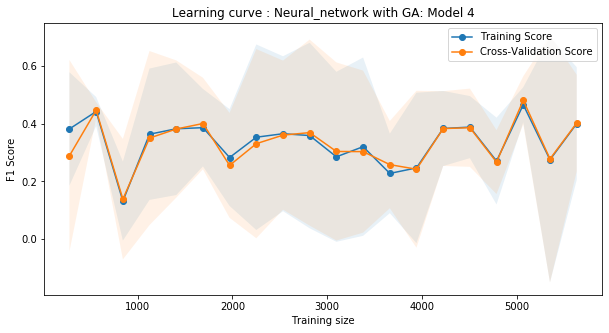

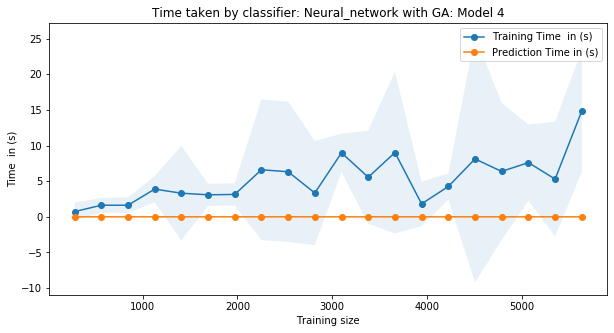

In [55]:
# ploting learning curve and time 
model4_nn_train,model4_nn_fit_time, model4_nn_pred_time = learning_curve(nn_model4_mp_25_lr_1, X_train, y_train, title= "Neural_network with GA: Model 4")

In [72]:
# time taken 

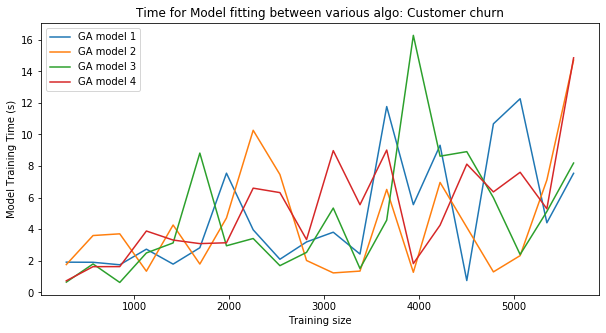

In [80]:
data_size = (np.linspace(.05, 1.0, 20) * len(y_train)).astype('int')
plt.figure()
plt.title("Time for Model fitting between various algo: Customer churn")
plt.xlabel("Training size")
plt.ylabel("Model Training Time (s)")
plt.plot(data_size, model1_nn_fit_time, '-', label="GA model 1")
plt.plot(data_size, model2_nn_fit_time, '-', label="GA model 2")
plt.plot(data_size, model3_nn_fit_time, '-', label="GA model 3")
plt.plot(data_size, model4_nn_fit_time, '-', label="GA model 4")
plt.legend(loc="best")
plt.show()

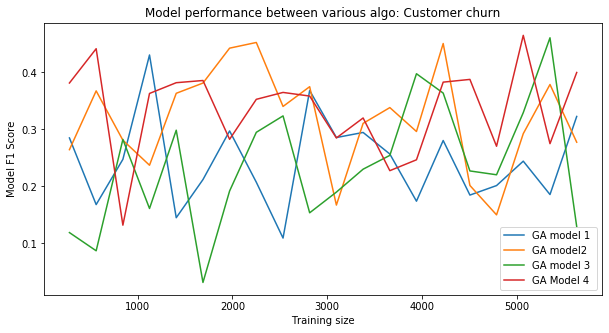

In [76]:
data_size = (np.linspace(.05, 1.0, 20) * len(y_train)).astype('int')
plt.figure()
plt.title("Model performance between various algo: Customer churn")
plt.xlabel("Training size")
plt.ylabel("Model F1 Score")
plt.plot(data_size, model1_nn_train, '-', label="GA model 1 ")
plt.plot(data_size, model2_nn_train, '-', label="GA model2")
plt.plot(data_size, model3_nn_train, '-', label="GA model 3")
plt.plot(data_size, model4_nn_train, '-', label="GA Model 4 ")
plt.legend(loc="best")
plt.show()

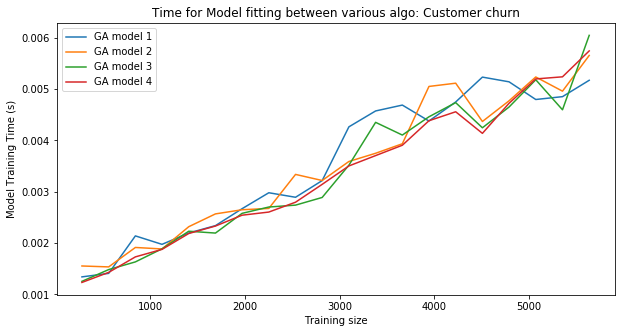

In [77]:
data_size = (np.linspace(.05, 1.0, 20) * len(y_train)).astype('int')
plt.figure()
plt.title("Time for Model fitting between various algo: Customer churn")
plt.xlabel("Training size")
plt.ylabel("Model Training Time (s)")
plt.plot(data_size, model1_nn_pred_time, '-', label="GA model 1")
plt.plot(data_size, model2_nn_pred_time, '-', label="GA model 2")
plt.plot(data_size, model3_nn_pred_time, '-', label="GA model 3")
plt.plot(data_size, model4_nn_pred_time, '-', label="GA model 4")
plt.legend(loc="best")
plt.show()